<a href="https://colab.research.google.com/github/javiershareprivate/curiosity/blob/master/Curiosity_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Albert - 332461110

# LeNet-5 implementation in Keras for Fashion-MNIST dataset

### In this notebook we implement the basic LeNet-5 architecture to the Fashion-MNIST dataset. Then we twist the architecture and check the effect of changing the number of hidden layers, the number of neurons by layer, the learning rate and the activation function. 

# Table of Contents
- Import Dataset
- Dataset Exploration
- Preprocessing
- Plot Function
- LeNet-5 Architecture
- Running the models:
  - Normal LeNet-5
  - Changing the number of hidden
  - Changing the number of neurons
  - Changing the activation function
  - Changing the learning rate
- Results  

# Import Dataset



In [1]:
import keras
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Image Shape: {}".format(X_train[0].shape))

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Image Shape: (28, 28)


# Dataset Exploration

In [2]:
# Let's see how big is the data set
print ('We have ' + str(len(y_train)) + ' datapoints in the Training set')
print ('We have ' + str(len(y_test)) + ' datapoints in the Test set')

We have 60000 datapoints in the Training set
We have 10000 datapoints in the Test set


In [3]:
# Let's see the different categories that we can have
import numpy as np
print ('We have ' + str(len(np.unique(y_train))) + ' different categories to classify')

We have 10 different categories to classify


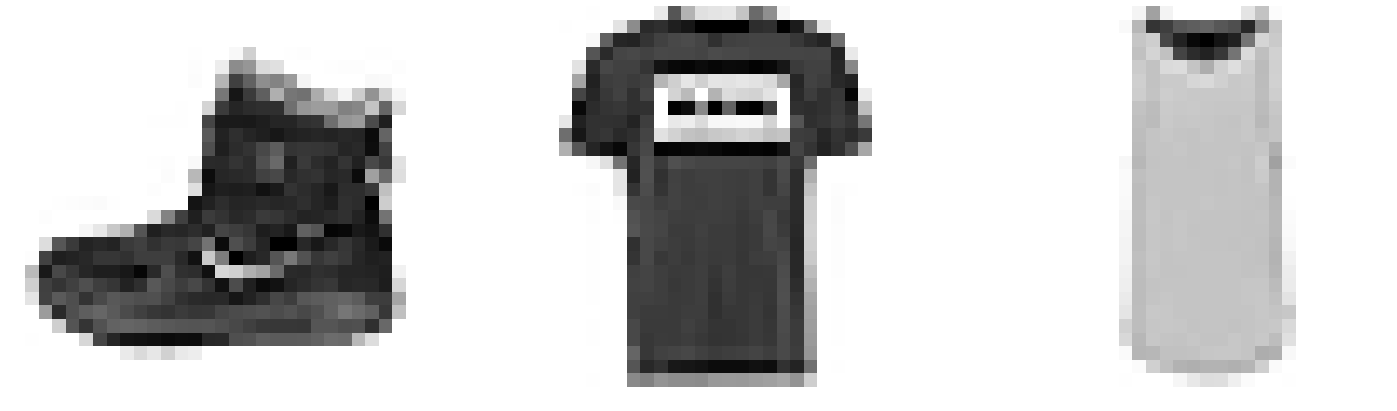

In [4]:
import matplotlib.pyplot as plt
# Let's see some of the pictures
plt.figure(figsize = (25,7))
plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(X_train[1])
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(X_train[2])
plt.axis('off');

# Preprocessing

In [5]:
# Reshape to add channel as 1 for convention
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Pad images to make them 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

# Pixel values between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#Standardization
#mean_px = X_train.mean().astype(np.float32)
#std_px = X_train.std().astype(np.float32)
#X_train = (X_train - mean_px)/(std_px)

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Updated Image Shape: (32, 32, 1)


# Define plot function that will be used to generate the convergence graphs

In [0]:
def plotConvergence(history, title):
  # Get training and test loss histories
  training_loss = history.history['acc']
  test_loss = history.history['val_acc']

  # Create count of the number of epochs
  epoch_count = range(1, len(training_loss) + 1)

  # Visualize loss history
  plt.plot(epoch_count, training_loss, 'r--')
  plt.plot(epoch_count, test_loss, 'b-')
  plt.legend(['Training Accuracy', 'Test Accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.ylim(0.7,1)

# LeNet-5 Architecture

![Image of LeNet-5](https://github.com/machine-learning/Lenet-5-tensorflow/blob/master/src/imgs/lenet-5.png?raw=true)

Input Image: 32x32.

__Layer 1:__   
Convolution with 6 kernells 3x3 each followed by ReLU.  
Input: 32x32. Output: 28x28x6.  

__Max Pooling Layer 1:__  
Input: 28x28x6. Output: 14x14x6.

__Layer 2:__  
Convolution with 16 kernells 3x3 each followed by ReLU.  
Input 14x14. Output: 10x10x16.

__Max Pooling Layer 2:__   
Input: 28x28x6. Output: 14x14x6.

__Flatten:__   
Input: 5x5x16. Output: 400

__Layer 3:__  
Fully Connected layer followed by ReLU.  
Input: 400. Output: 120.

__Layer 4:__  
Fully Connected layer followed by ReLU.  
Input: 120. Output: 84.

__Layer 5:__  
Fully Connected layer followed by Softmax.  
Input: 84. Output: 10.

# LeNet-5 (Normal)

In [7]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5 = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.5602 - acc: 0.7971 - val_loss: 0.4436 - val_acc: 0.8368
Epoch 2/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3632 - acc: 0.8691 - val_loss: 0.3587 - val_acc: 0.8668
Epoch 3/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3168 - acc: 0.8850 - val_loss: 0.3243 - val_acc: 0.8808
Epoch 4/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2878 - acc: 0.8940 - val_loss: 0.3120 - val_acc: 0.8851
Epoch 5/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2677 - acc: 0.9005 - val_loss: 0.3147 - val_acc: 0.8830
Epoch 6/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2490 - acc: 0.9077 - val_loss: 0.2936 - val_acc: 0.8931
Epoch 7/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2355 - acc: 0.9117 - val_loss: 0.3063 -

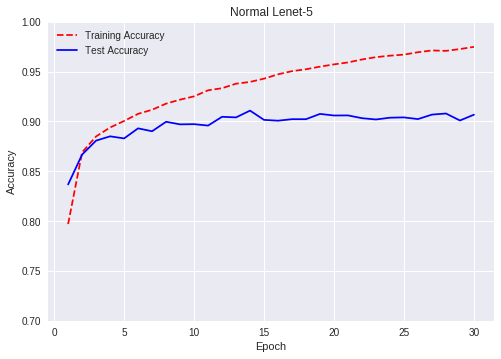

In [8]:
plotConvergence(historyLenet5, 'Normal Lenet-5')

# Changing the number of hidden layers 

Here we eliminate the first 2 fully connected layers. We see that overall we achieve the same test accuracy. One effect that we see is that the training accuracy is less than with the normal LeNet-5 architecture. Given that the test accuracy is the same we can only assume that this change may cause a little less overfitting.

In [9]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5LessConnectedLayers = model.fit(x=X_train, 
                                             y=y_train, 
                                             batch_size = batch_size,
                                             epochs = epochs,
                                             validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.6193 - acc: 0.7767 - val_loss: 0.4783 - val_acc: 0.8268
Epoch 2/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.4288 - acc: 0.8489 - val_loss: 0.4520 - val_acc: 0.8307
Epoch 3/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3859 - acc: 0.8643 - val_loss: 0.4004 - val_acc: 0.8536
Epoch 4/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3588 - acc: 0.8732 - val_loss: 0.3814 - val_acc: 0.8666
Epoch 5/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3377 - acc: 0.8802 - val_loss: 0.3509 - val_acc: 0.8783
Epoch 6/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3210 - acc: 0.8861 - val_loss: 0.3442 - val_acc: 0.8780
Epoch 7/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3071 - acc: 0.8902 - val_loss: 0.3312 - 

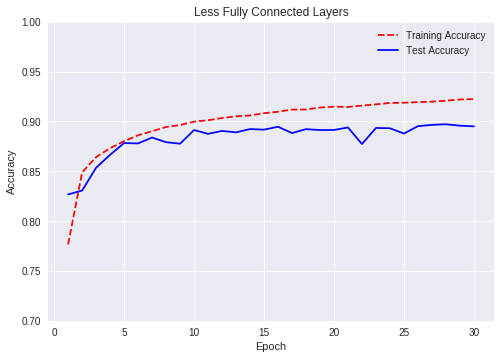

In [10]:
plotConvergence(historyLenet5LessConnectedLayers, 'Less Fully Connected Layers')

Here we also eliminate one of the convolutional layers including the corresponding activation and the pooling layers. Once again we see that the train/test accuracy is like before. This lets us think that the original LeNet-5 is an over-complicated architecture for this specific dataset, given that we can achieve similar accuracy with much less layers. 

In [11]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5LessHiddenLayers = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.5844 - acc: 0.7956 - val_loss: 0.4905 - val_acc: 0.8159
Epoch 2/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.4100 - acc: 0.8571 - val_loss: 0.4090 - val_acc: 0.8544
Epoch 3/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.3707 - acc: 0.8705 - val_loss: 0.3896 - val_acc: 0.8640
Epoch 4/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.3455 - acc: 0.8788 - val_loss: 0.3657 - val_acc: 0.8727
Epoch 5/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.3271 - acc: 0.8855 - val_loss: 0.3440 - val_acc: 0.8788
Epoch 6/30
60000/60000 [==============================] - 6s 98us/step - loss: 0.3105 - acc: 0.8913 - val_loss: 0.3362 - val_acc: 0.8804
Epoch 7/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.2987 - acc: 0.8951 - val_loss: 0.3401 - val_ac

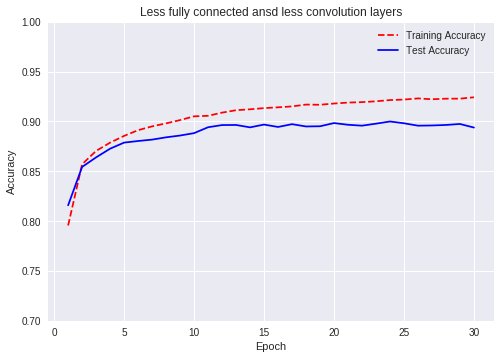

In [12]:
plotConvergence(historyLenet5LessHiddenLayers, 'Less fully connected ansd less convolution layers')

# Changing the number of neurons in the convolutional layers

Here we add more neurons to every layer. We see that altough the test accuracy remains the same the train accuracy jumps to almost 99%, meaning the network is overfitting to the training set given the higher number of neurons.

In [13]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 10, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 30, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 200, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5MoreNeurons = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 151us/step - loss: 0.5243 - acc: 0.8093 - val_loss: 0.3914 - val_acc: 0.8610
Epoch 2/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.3375 - acc: 0.8772 - val_loss: 0.3339 - val_acc: 0.8751
Epoch 3/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.2911 - acc: 0.8942 - val_loss: 0.3103 - val_acc: 0.8852
Epoch 4/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.2590 - acc: 0.9037 - val_loss: 0.2997 - val_acc: 0.8898
Epoch 5/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.2353 - acc: 0.9136 - val_loss: 0.2783 - val_acc: 0.8973
Epoch 6/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.2173 - acc: 0.9191 - val_loss: 0.2777 - val_acc: 0.9002
Epoch 7/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.1979 - acc: 0.9265 - val_loss: 0.2911 - 

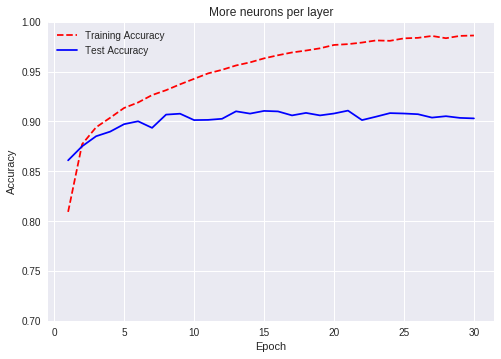

In [14]:
plotConvergence(historyLenet5MoreNeurons, 'More neurons per layer')

Here we reduce the number of neurons on every layer. We see that both the train and test accuracy are worst than before. With the reduced number of neurons by layer we see that the network is underfitting because it doesn't have the capacity to achieve the best possible performance.

In [15]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 3, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 5, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 40, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 20, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5LessNeurons = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.8022 - acc: 0.6977 - val_loss: 0.6126 - val_acc: 0.7716
Epoch 2/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.5457 - acc: 0.7994 - val_loss: 0.5095 - val_acc: 0.8217
Epoch 3/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.4814 - acc: 0.8284 - val_loss: 0.4798 - val_acc: 0.8313
Epoch 4/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.4464 - acc: 0.8411 - val_loss: 0.4492 - val_acc: 0.8401
Epoch 5/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.4229 - acc: 0.8491 - val_loss: 0.4379 - val_acc: 0.8441
Epoch 6/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.4076 - acc: 0.8544 - val_loss: 0.4266 - val_acc: 0.8467
Epoch 7/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.3902 - acc: 0.8590 - val_loss: 0.4217 - 

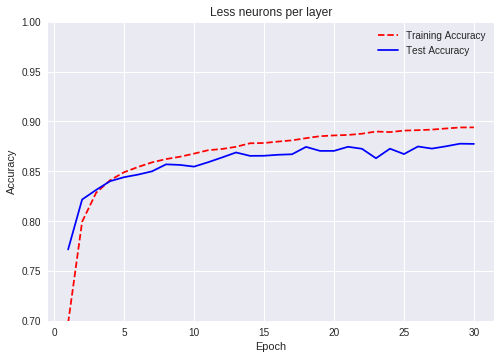

In [16]:
plotConvergence(historyLenet5LessNeurons, 'Less neurons per layer')

# Changing the activation function

Here we use the hyperbolic tangence (tanh) as the activation function instead of ReLu. We see that comparing to normal ReLu the tanh activation function doesn't improve the test accuracy and causes the train accuracy to jump to 99%. Meaning that with this activation function the network is overfitting to the training set. 

In [17]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'tanh', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'tanh',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'tanh'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'tanh'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5Tanh = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 147us/step - loss: 0.4866 - acc: 0.8249 - val_loss: 0.3819 - val_acc: 0.8638
Epoch 2/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.3329 - acc: 0.8790 - val_loss: 0.3440 - val_acc: 0.8742
Epoch 3/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2932 - acc: 0.8931 - val_loss: 0.3239 - val_acc: 0.8812
Epoch 4/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2647 - acc: 0.9029 - val_loss: 0.2958 - val_acc: 0.8910
Epoch 5/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2457 - acc: 0.9091 - val_loss: 0.2903 - val_acc: 0.8933
Epoch 6/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.2306 - acc: 0.9140 - val_loss: 0.2879 - val_acc: 0.8943
Epoch 7/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.2136 - acc: 0.9204 - val_loss: 0.2867 - 

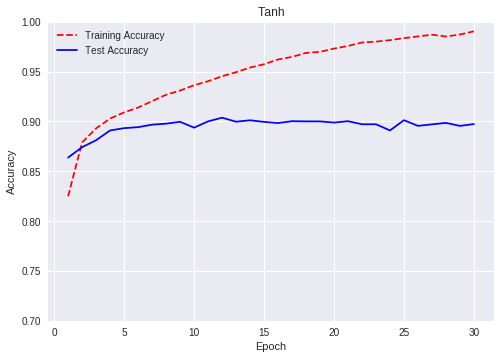

In [18]:
plotConvergence(historyLenet5Tanh, 'Tanh')

Here we change to a sigmoid activation function. We see that the test accuracy graph is more jumpy and takes longer to converge than in other cases. At the end it achieves a similar accuracy of 90% as with ReLu.

In [19]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'sigmoid', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'sigmoid',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'sigmoid'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'sigmoid'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5Sigmoid = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 146us/step - loss: 1.1222 - acc: 0.5854 - val_loss: 0.6852 - val_acc: 0.7381
Epoch 2/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.6075 - acc: 0.7644 - val_loss: 0.5767 - val_acc: 0.7815
Epoch 3/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.5223 - acc: 0.8041 - val_loss: 0.5085 - val_acc: 0.8068
Epoch 4/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.4660 - acc: 0.8274 - val_loss: 0.4592 - val_acc: 0.8289
Epoch 5/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.4281 - acc: 0.8426 - val_loss: 0.4320 - val_acc: 0.8434
Epoch 6/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3982 - acc: 0.8535 - val_loss: 0.4077 - val_acc: 0.8475
Epoch 7/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3762 - acc: 0.8601 - val_loss: 0.4137 - 

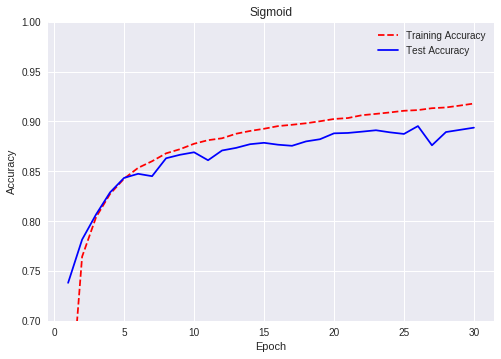

In [20]:
plotConvergence(historyLenet5Sigmoid, 'Sigmoid')

# Changing the learning rate

Here we reduce the learning rate from 0.001 to 0.0005, meaning we take smaller steps when learning. We see that we achieve a slightly better accuracy and a more stable accuracy above 90% in the test set. 

In [21]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(lr=0.0005), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5LR00005 = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 149us/step - loss: 0.6308 - acc: 0.7712 - val_loss: 0.4705 - val_acc: 0.8308
Epoch 2/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.4134 - acc: 0.8502 - val_loss: 0.4198 - val_acc: 0.8477
Epoch 3/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.3667 - acc: 0.8675 - val_loss: 0.3629 - val_acc: 0.8691
Epoch 4/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3364 - acc: 0.8770 - val_loss: 0.3720 - val_acc: 0.8613
Epoch 5/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.3156 - acc: 0.8855 - val_loss: 0.3381 - val_acc: 0.8793
Epoch 6/30
60000/60000 [==============================] - 8s 137us/step - loss: 0.2973 - acc: 0.8917 - val_loss: 0.3358 - val_acc: 0.8776
Epoch 7/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.2858 - acc: 0.8956 - val_loss: 0.3191 - 

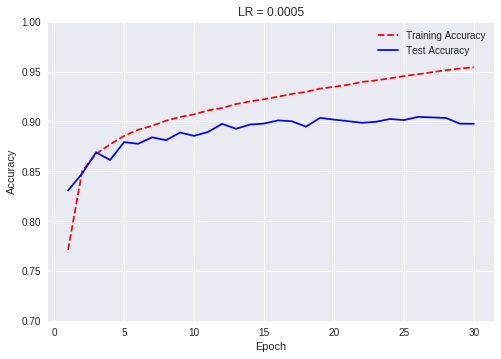

In [22]:
plotConvergence(historyLenet5LR00005, 'LR = 0.0005')

Here we increase the learning rate from 0.001 to 0.01, meaning we take larger steps when learning. We see from the graph that this learning rate may be too big since that both the train and test accuracy are bumpy and jump from 85% to 90% on every epoch. We clearly see that this is not a good enough (or small enough) learning rate.

In [23]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

# Hyperparameters
batch_size = 64
epochs = 30

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))

# Pooling Layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Convolutional Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))

# Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(units = 120, activation = 'relu'))

# Fully Connected Layer 2
model.add(Dense(units = 84, activation = 'relu'))

# Fully Connected Layer 3 (output layer)
model.add(Dense(units = 10, activation = 'softmax'))

# Compile Model 
model.compile(optimizer = keras.optimizers.Adam(lr=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
historyLenet5LR001 = model.fit(x=X_train, 
                          y=y_train, 
                          batch_size = batch_size,
                          epochs = epochs,
                          validation_data = (X_test, y_test))

y_pred = model.predict(X_test)

#Converting one hot vectors to labels
labels = np.argmax(y_pred, axis = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.4825 - acc: 0.8233 - val_loss: 0.3894 - val_acc: 0.8642
Epoch 2/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.3621 - acc: 0.8682 - val_loss: 0.4082 - val_acc: 0.8490
Epoch 3/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.3368 - acc: 0.8765 - val_loss: 0.3930 - val_acc: 0.8626
Epoch 4/30
60000/60000 [==============================] - 8s 138us/step - loss: 0.3236 - acc: 0.8817 - val_loss: 0.3642 - val_acc: 0.8692
Epoch 5/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.3078 - acc: 0.8872 - val_loss: 0.3358 - val_acc: 0.8863
Epoch 6/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.3051 - acc: 0.8880 - val_loss: 0.3793 - val_acc: 0.8693
Epoch 7/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.2972 - acc: 0.8920 - val_loss: 0.3464 - 

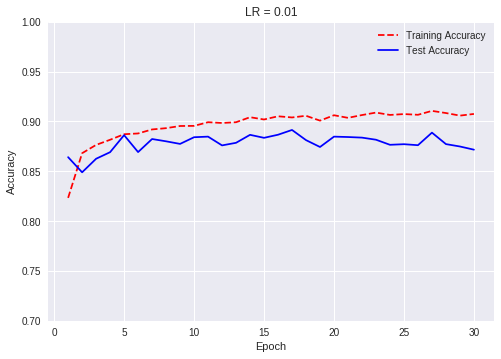

In [24]:
plotConvergence(historyLenet5LR001, 'LR = 0.01')

# Results

## Comparing Hidden Layers

We see that for this particular classification problem and this particular dataset the number of layers (or at least the changes we tried) don't have a drastic effect on the accuracy of the model. We do see that with the full LeNet-5 architecture we get more train overfitting that with the reduced examples. This may suggest that a simpler architecture may be more suitable for this kind of problem.

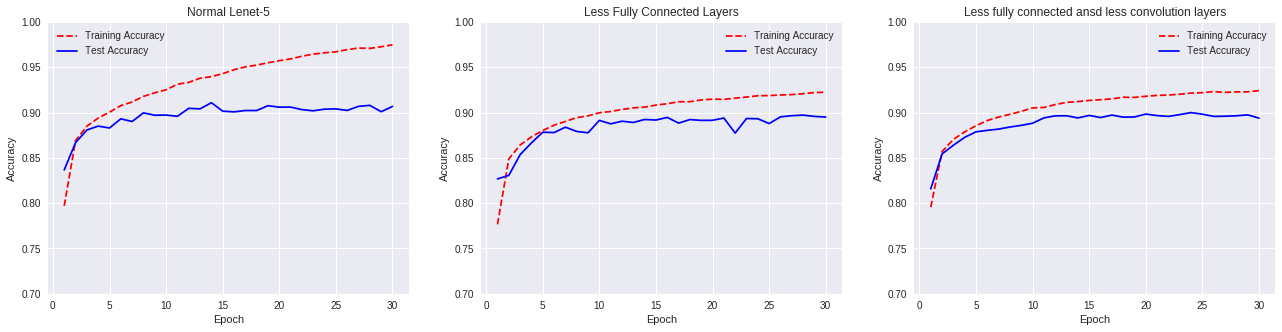

In [25]:
plt.figure(figsize = (22,5))
plt.subplot(131)
plotConvergence(historyLenet5, 'Normal Lenet-5')
plt.subplot(132)
plotConvergence(historyLenet5LessConnectedLayers, 'Less Fully Connected Layers')
plt.subplot(133)
plotConvergence(historyLenet5LessHiddenLayers, 'Less fully connected ansd less convolution layers')

## Comparing number of neurons

First we see that when adding neurons on every layer we get a very quick and very high accuracy on the training set, while the test accuracy achieves similar values but it'smore noisy. We correlate this behaviour with high overfitting, typical of a model with more parameters (neurons) than needed.  

On the other hand, when we dramatically reduce the number of neurons per layer we see that our model underperforms, and it surely is because it doesn't have the capacity (number of parameters) to correctly describe the underlying behaviour of the dataset.

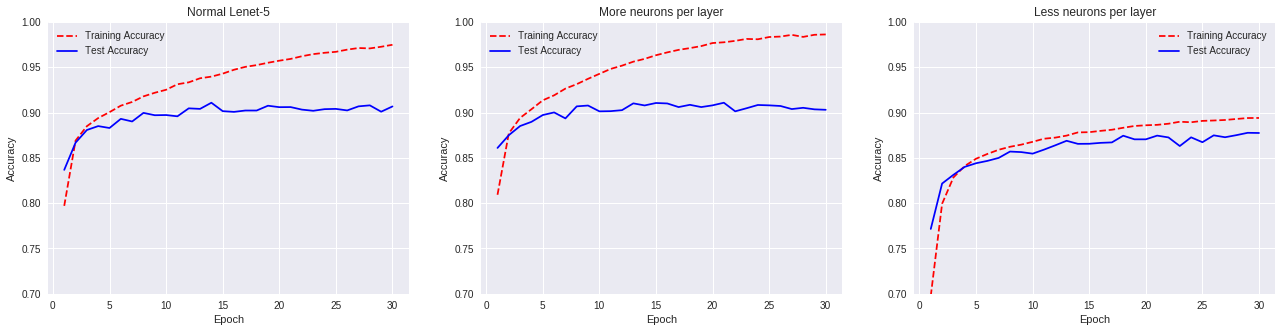

In [26]:
plt.figure(figsize = (22,5))
plt.subplot(131)
plotConvergence(historyLenet5, 'Normal Lenet-5')
plt.subplot(132)
plotConvergence(historyLenet5MoreNeurons, 'More neurons per layer')
plt.subplot(133)
plotConvergence(historyLenet5LessNeurons, 'Less neurons per layer')

## Comparing Activation Functions

Here we see the effect of the activation function. We see that the ReLu activation function seems to be the best choice for this particular problem. This is because the Tanh achieves a slightly worst test accuracy while the Sigmoid is considerably less (and much slower).

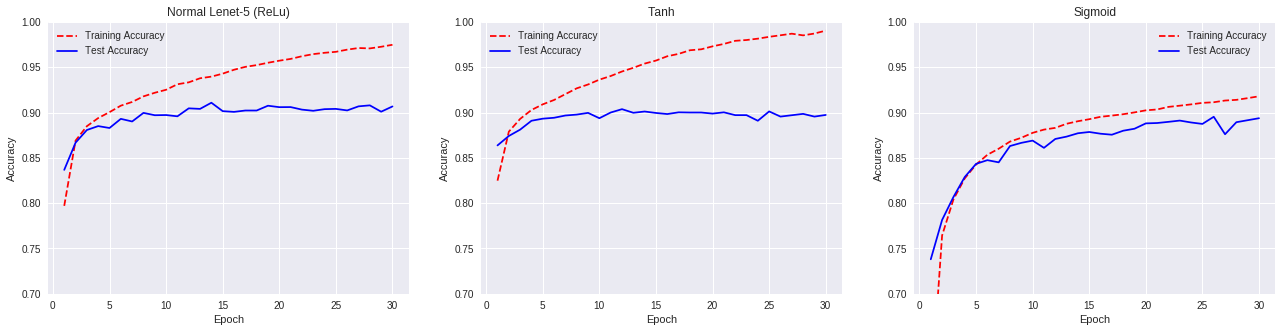

In [27]:
plt.figure(figsize = (22,5))
plt.subplot(131)
plotConvergence(historyLenet5, 'Normal Lenet-5 (ReLu)')
plt.subplot(132)
plotConvergence(historyLenet5Tanh, 'Tanh')
plt.subplot(133)
plotConvergence(historyLenet5Sigmoid, 'Sigmoid')

## Comparing Learning rate

When looking at the learning rate we know a priori that smaller learning steps achieve (in general) better results and better accuracy, altough they are slower learners. On the other hand larger learning steps are faster but may miss some optimal points and are worst learners.  

This is exactly what we see, that reducing the learning rate achieves a better (slightly better) performance while increasing the learning rate gives more noise and an overall worst accuracy.

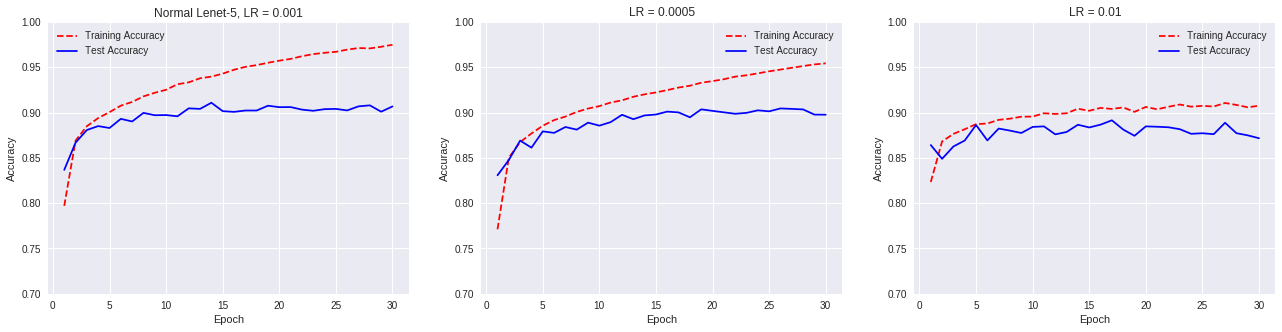

In [28]:
plt.figure(figsize = (22,5))
plt.subplot(131)
plotConvergence(historyLenet5, 'Normal Lenet-5, LR = 0.001')
plt.subplot(132)
plotConvergence(historyLenet5LR00005, 'LR = 0.0005')
plt.subplot(133)
plotConvergence(historyLenet5LR001, 'LR = 0.01')